In [ ]:
from keras

In [3]:
import numpy as np
import tensorflow as tf
from collections import deque
from matplotlib import pyplot as plt
import gym

In [4]:
env = gym.make('Breakout-v0')

In [5]:
# Constants defining our neural network
learning_rate = 1e-1
input_size = env.observation_space.shape[0]
output_size = env.action_space.n

X = tf.placeholder(tf.float32, [None, input_size], name="input_x")

Qpred = tf.matmul(X, W1)

            

# Qpred = tf.matmul(wx1w2w3w4w5, W6)

# We need to define the parts of the network needed for learning a policy
Y = tf.placeholder(shape=[None, output_size], dtype=tf.float32)

# Loss function
loss = tf.reduce_sum(tf.square(Y - Qpred))
# Learning
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

# Values for q learning
max_episodes = 1000
dis = 0.9
step_history = []


# Setting up our environment
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for episode in range(max_episodes):
    e = 1. / ((episode / 10) + 1)
    step_count = 0
    state = env.reset()
    done = False

    # The Q-Network training
    while not done:
        step_count += 1
        x = np.reshape(state, [1, input_size])
        # Choose an action by greedily (with e chance of random action) from
        # the Q-network
        Q = sess.run(Qpred, feed_dict={X: x})
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q)

        # Get new state and reward from environment
        next_state, reward, done, _ = env.step(action)
        if done:
            Q[0, action] = -100
        else:
            x_next = np.reshape(next_state, [1, input_size])
            # Obtain the Q' values by feeding the new state through our network
            Q_next = sess.run(Qpred, feed_dict={X: x_next})
            Q[0, action] = reward + dis * np.max(Q_next)

        # Train our network using target and predicted Q values on each episode
        sess.run(train, feed_dict={X: x, Y: Q})
        state = next_state

    step_history.append(step_count)
    print("Episode: {}  steps: {}".format(episode, step_count))
    # If last 10's avg steps are 500, it's good enough
    if len(step_history) > 10 and np.mean(step_history[-10:]) > 500:
        break

# See our trained network in action
observation = env.reset()
reward_sum = 0
while True:
    env.render()

    x = np.reshape(observation, [1, input_size])
    Q = sess.run(Qpred, feed_dict={X: x})
    action = np.argmax(Q)

    observation, reward, done, _ = env.step(action)
    reward_sum += reward
    if done:
        print("Total score: {}".format(reward_sum))
        break

NameError: name 'W1' is not defined

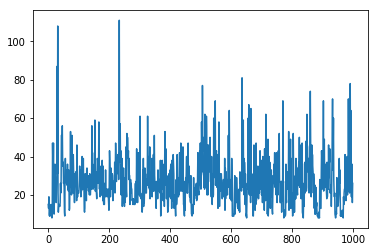

In [2]:
plt.plot(step_history)